# House Price Analysis

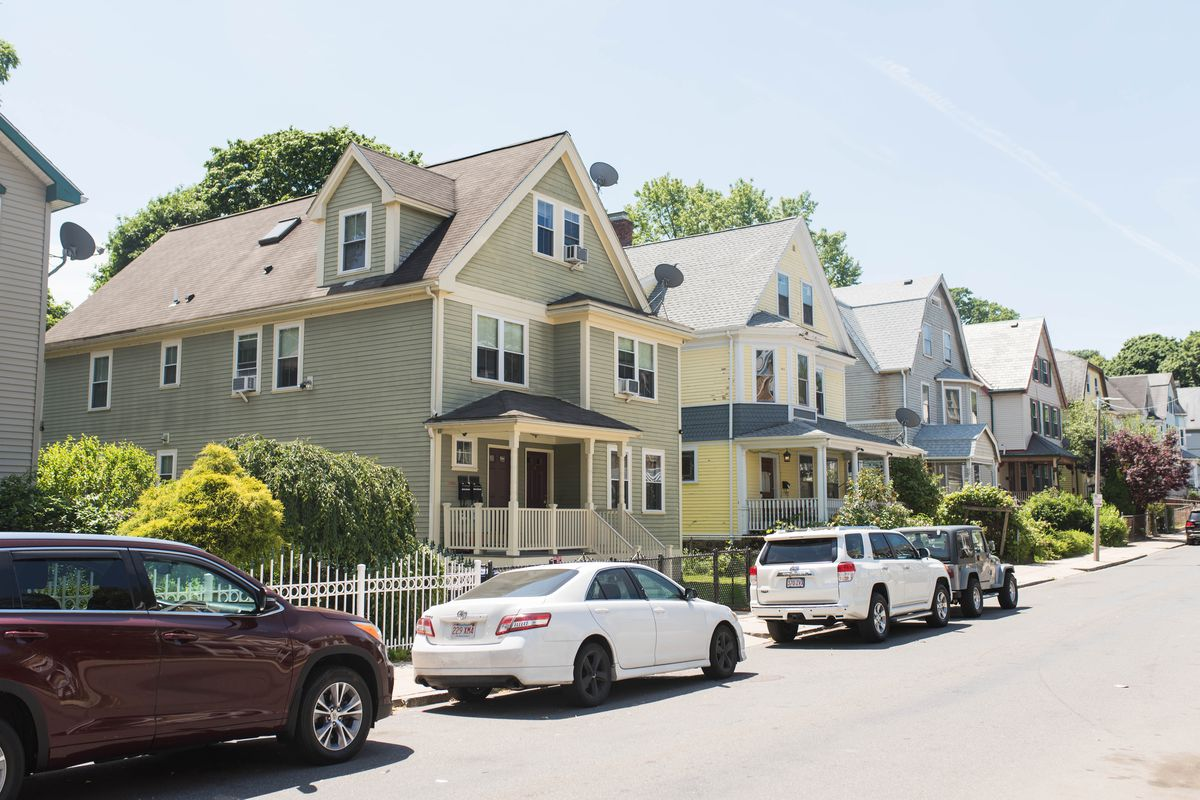

# Background

Salah satu tantangan untuk menjual dan membeli rumah dewasa ini adalah menentukan harganya. Hal ini sangat penting terutama bagi penjual ataupun pembeli rumah. Kita tidak mengetahui faktor-faktor apa saja yang mempengaruhi harga rumah.

Pada penelitian kali ini, kita akan menggunakan statistik untuk mengetahui harga rumah yang sesuai serta mengetahui faktor-faktor apa saja yang mempengaruhi harga rumah. Analisis yang kita gunakan adalah membuat analisa dari data harga rumah sebelumnya disertai dengan variable-variable yang memengaruhi harga rumah.

Analisis ini akan bermanfaat bagi penjual dan pembeli

penjual:
- untuk menghindari harga yang terlampau murah
- membuat action agar dapat menaikkan harga jual rumahnya

pembeli:
- untuk menghindari harga yang terlampau mahal
- membuat perencanaan keuangan yang sesuai dengan kriteria hunian impiannya 

## Data yang digunakan

Data yang digunakan dalam penelitian kali ini adalah dengan menggunakan data harga rumah disertai dengan variabel-variabel yang mempengaruhinya. Adapun data tersebut dapat dilihat pada link berikut : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

## Penjelasan Variable

**House Price Dataset**:

- `area` : luas tanah [1650 - 13290]
- `bedrooms` : jumlah kamar tidur [1-6]
- `bathrooms` : jumlah kamar mandi [1-4]
- `stories` : jumlah lantai [1-4]
- `mainroad` : apakah terkoneksi dengan jalan utama atau tidak [yes,no]
- `guestroom` : apakah terdapat ruang tamu atau tidak [yes,no]
- `basement` : apakah terdapat basement atau tidak [yes,no]
- `waterheating` : apakah terdapat pemanas air atau tidak [yes,no]
- `airconditioning` : apakah terdapat AC atau tidak [yes,no]
- `parking` : jumlah tempat parkit [1-3]
- `prefarea` : merupakan area potensial (preferensi banyak orang) atau tidak [yes,no]
- `furnishingstatus` : status furniture atau perabotan dalam rumah [furnished, semi-furnished, unfurnished]

variable outcome :
- `price` : harga rumah dalam USD

## **Define The Problems:**
- Variabel manakah pada data yang mempunyai pengaruh terhadap harga rumah?
- Manakah yang lebih tinggi harganya, rumah yang berada pada jalan utama atau tidak?
- Manakah yang lebih tinggi harganya, rumah yang memiliki ruang tamu atau tidak?
- Manakah yang lebih tinggi harganya, rumah yang memiliki basement atau tidak?
- Manakah yang lebih tinggi harganya, rumah yang memiliki pemanas air atau tidak?
- Manakah yang lebih tinggi harganya, rumah yang memiliki AC atau tidak?
- Bagaimana kesimpulan dan rekomendasinya?

## Import Modul

Pada tahapan ini, kita import modul yang dibutuhkan

In [1]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

## Load Dataset

Kita load dataset dan dimasukkan ke dalam dataframe

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Cek Variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Dari informasi tersebut diketahui bahwasanya tidak terdapat missing values pada data

## Cek Data Duplikat

In [4]:
def removeDuplicates(data):
    print(f"shape awal                    : {data.shape}, (#observasi, #fitur)")
    
     # Drop duplicate
    data = data.drop_duplicates()
    print(f"shape setelah drop duplikat   : {data.shape}, (#observasi, #fitur)")

    return data

In [5]:
df = removeDuplicates(df)
df

shape awal                    : (545, 13), (#observasi, #fitur)
shape setelah drop duplikat   : (545, 13), (#observasi, #fitur)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Pada informasi di atas, diketahui bahwa tidak terdapat pengurangan data (tidak ada data duplikat)

# Exploratory Data Analysis

## Variable mainroad

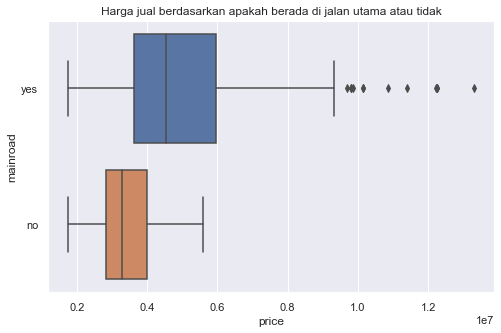

In [6]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "mainroad", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah berada di jalan utama atau tidak")
plt.show()

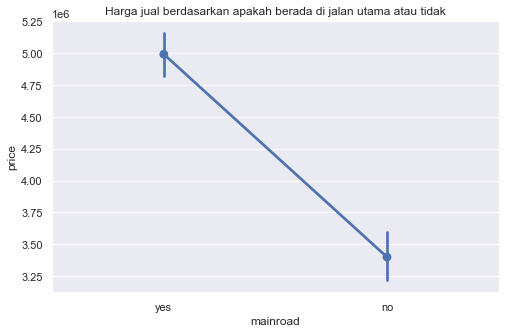

In [7]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "mainroad", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah berada di jalan utama atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah itu terkoneksi langsung dengan jalan raya atau tidak. Apabila rumah tersebut terkoneksi langsung dengan jalan utama, maka kecenderungan memiliki harga lebih tinggi dibandingkan dengan rumah yang tidak terhubung langsung dengan jalan utama. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

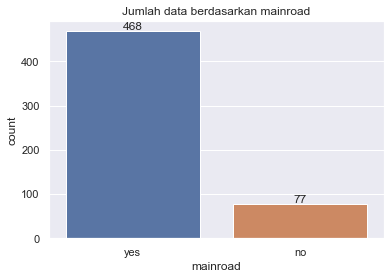

In [8]:
ax = sns.countplot(x='mainroad', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan mainroad')
plt.show()

## Variable Guest Room

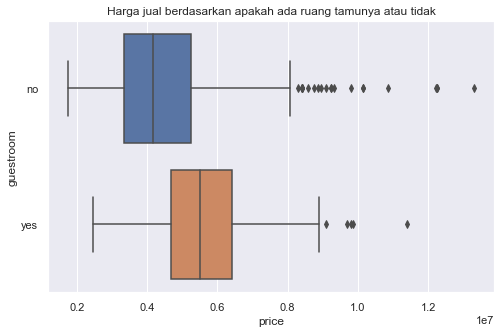

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "guestroom", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah ada ruang tamunya atau tidak")
plt.show()

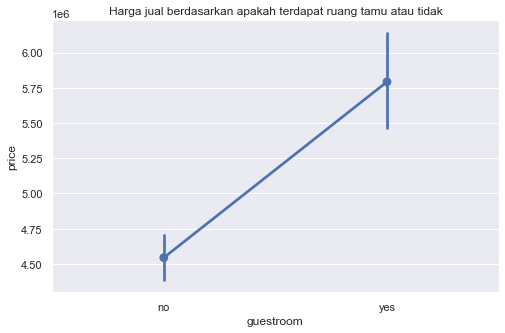

In [10]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "guestroom", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah terdapat ruang tamu atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah tersebut memiliki ruang tamu atau tidak. Apabila rumah tersebut memiliki ruang tamu, maka memiliki kecenderungan mempunyai harga lebih tinggi dibandingkan dengan rumah yang tidak memiliki ruang tamu. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

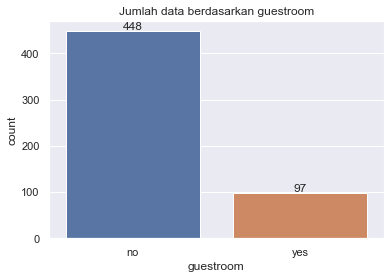

In [11]:
ax = sns.countplot(x='guestroom', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan guestroom')
plt.show()

## Variable Basement

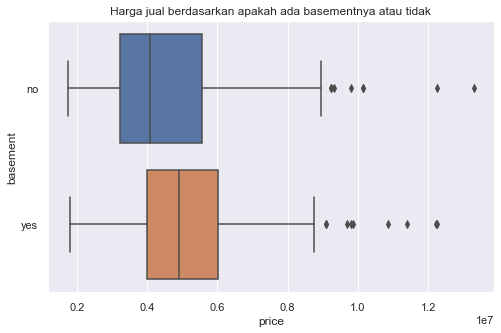

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "basement", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah ada basementnya atau tidak")
plt.show()

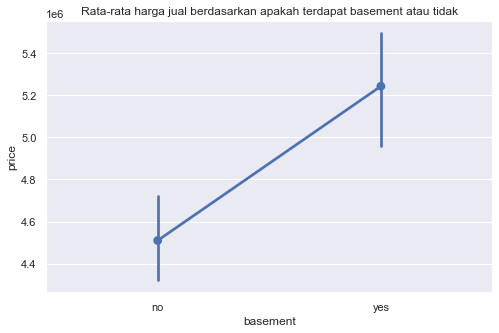

In [13]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "basement", data = df, ax = ax)
ax.set_title("Rata-rata harga jual berdasarkan apakah terdapat basement atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah tersebut memiliki basement atau tidak. Apabila rumah tersebut memiliki basement, maka memiliki kecenderungan mempunyai harga lebih tinggi dibandingkan dengan rumah yang tidak memiliki basement. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

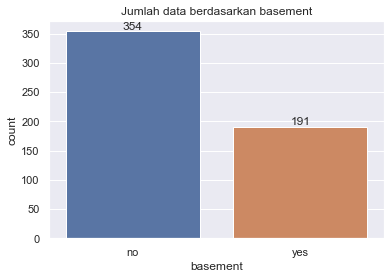

In [14]:
ax = sns.countplot(x='basement', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan basement')
plt.show()

## Variable Hot Waterheating

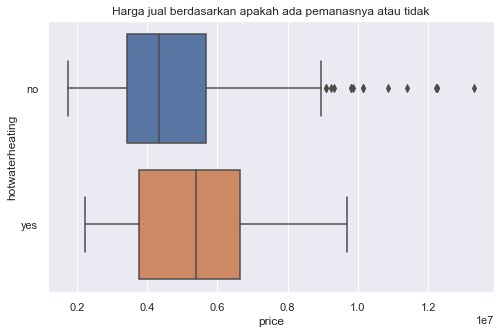

In [15]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "hotwaterheating", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah ada pemanasnya atau tidak")
plt.show()

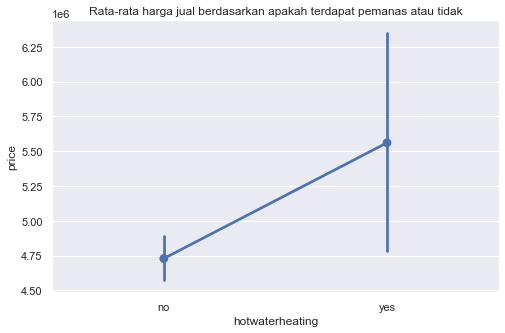

In [16]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "hotwaterheating", data = df, ax = ax)
ax.set_title("Rata-rata harga jual berdasarkan apakah terdapat pemanas atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah tersebut memiliki pemanas air atau tidak. Apabila rumah tersebut memiliki pemanas air, maka memiliki kecenderungan mempunyai harga lebih tinggi dibandingkan dengan rumah yang tidak memiliki pemanas air. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

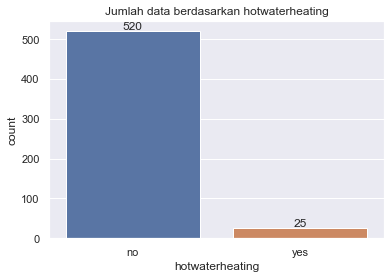

In [17]:
ax = sns.countplot(x='hotwaterheating', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan hotwaterheating')
plt.show()

## Variable Air Conditioning

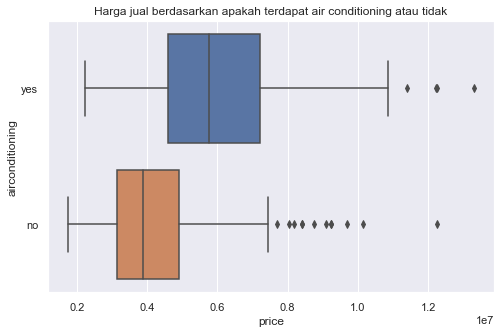

In [45]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "airconditioning", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah terdapat air conditioning atau tidak")
plt.show()

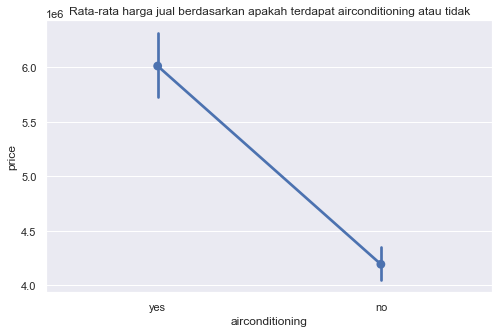

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "airconditioning", data = df, ax = ax)
ax.set_title("Rata-rata harga jual berdasarkan apakah terdapat airconditioning atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah tersebut memiliki AC atau tidak. Apabila rumah tersebut memiliki AC, maka memiliki kecenderungan mempunyai harga lebih tinggi dibandingkan dengan rumah yang tidak memiliki AC. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

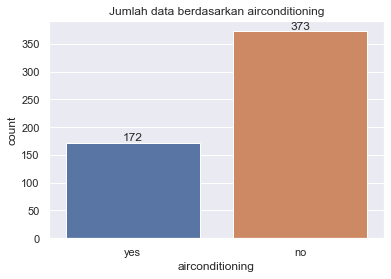

In [20]:
ax = sns.countplot(x='airconditioning', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan airconditioning')
plt.show()

## Variable Prefarea

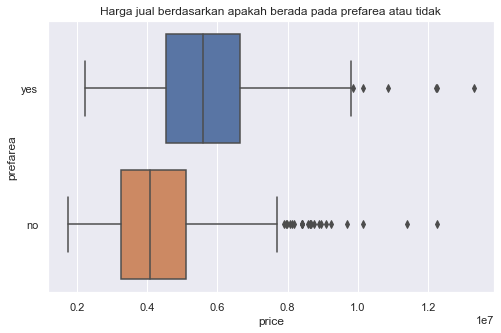

In [21]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "prefarea", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan apakah berada pada prefarea atau tidak")
plt.show()

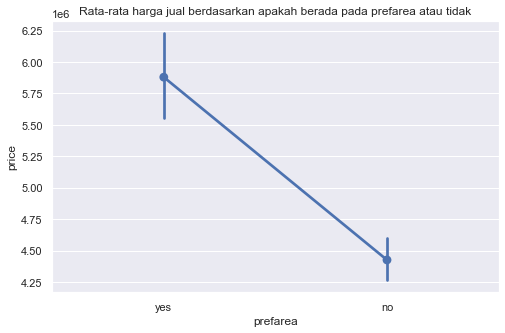

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "prefarea", data = df, ax = ax)
ax.set_title("Rata-rata harga jual berdasarkan apakah berada pada prefarea atau tidak")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan apakah rumah tersebut berada pada lokasi prefarea atau tidak. Apabila rumah tersebut berada pada lokasi prefarea, maka memiliki kecenderungan mempunyai harga lebih tinggi dibandingkan dengan rumah yang tidak berada pada lokasi prefarea. Namun, apakah pada populasi kondisi tersebut juga berlaku? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (Uji t 2 independen sampel).

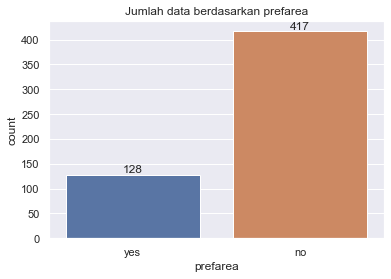

In [23]:
ax = sns.countplot(x='prefarea', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan prefarea')
plt.show()

## Variable Furnishing Status

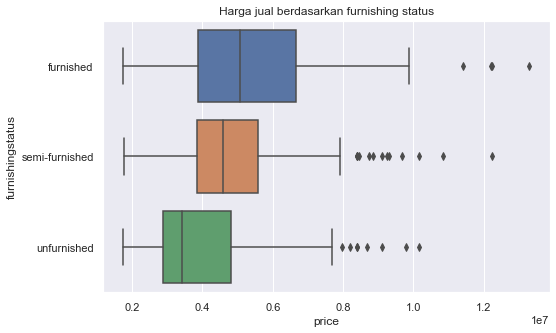

In [24]:
fig, ax = plt.subplots(figsize = (8,5))
sns.boxplot(x = "price", y = "furnishingstatus", data = df, ax = ax)
ax.set_title("Harga jual berdasarkan furnishing status")
plt.show()

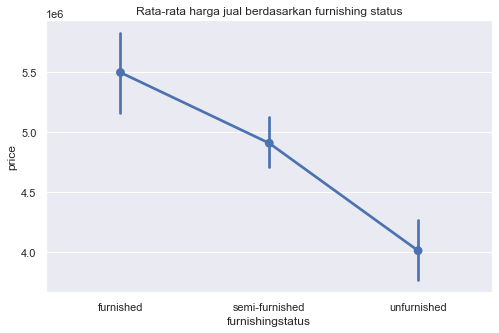

In [25]:
fig, ax = plt.subplots(figsize = (8,5))
sns.pointplot(y = "price", x = "furnishingstatus", data = df, ax = ax)
ax.set_title("Rata-rata harga jual berdasarkan furnishing status")
plt.show()

Berdasarkan box plot dan point plot di atas, kita dapat lihat bahwa adanya perbedaan rata-rata harga rumah berdasarkan rumah tersebut telah difurnish, semi furnished atau belum difurnish. Terlihat bahwa rumah yang furnished memiliki kecenderungan yang memiliki harga paling tinggi dibandingkan dengan yang semi-furnished pekerjaan. Kemudian, rumah yang unfurnished memiliki tingkat kecenderungan harga yang paling rendah dibandingkan yang furnished dan semi furnished. Namun, apakah pada populasi kondisi tersebut juga berlaku yang dimana adanya perbedaan rata - rata harga rumah pada status furnished? Untuk menjawab pertanyaan tersebut, dapat dilakukan uji statistik (ANOVA).

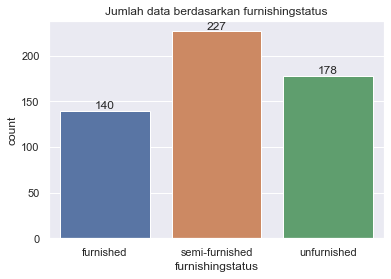

In [26]:
ax = sns.countplot(x='furnishingstatus', data=df)
ax.bar_label(ax.containers[0])
ax.set_title('Jumlah data berdasarkan furnishingstatus')
plt.show()

# Statistical Test

Pada tahapan ini, kita akan menguji asumsi yang kita dapat pada proses EDA sebelumnya.

In [27]:
# Import module
from scipy.stats import ttest_ind,levene,kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import normal_ad

## T-test Mainroad

In [28]:
mainroad_yes = df[df["mainroad"] == "yes"]["price"] # Membuat variabel untuk kategori mainroad yes.
mainroad_no = df[df["mainroad"] == "no"]["price"] # Membuat variabel untuk kategori mainroad no.

n_mainroad_yes = mainroad_yes.shape[0] # Menghitung jumlah observasi pada kategori mainroad yes.
n_mainroad_no = mainroad_no.shape[0] # Menghitung jumlah obsercasi pada kategori mainroad no.
result = ttest_ind(mainroad_yes, mainroad_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk mainroad yes = {n_mainroad_yes}')
print(f'Banyak sampel untuk mainroad no = {n_mainroad_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_mainroad_yes - mu_mainroad_no <= 0')
print('H1 : mu_mainroad_yes - mu_mainroad_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk mainroad yes = 468
Banyak sampel untuk mainroad no = 77
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_mainroad_yes - mu_mainroad_no <= 0
H1 : mu_mainroad_yes - mu_mainroad_no > 0
alpha = 0.05
Statistik Hitung = 7.245125201307269
P Value = 7.450520744453144e-13
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang terhubung dengan jalan utama atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang terhubung dengan jalan utama memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak terhubung dengan jalan utama.

## T-test Guestroom

In [29]:
guestroom_yes = df[df["guestroom"] == "yes"]["price"] # Membuat variabel untuk kategori guestroom yes.
guestroom_no = df[df["guestroom"] == "no"]["price"] # Membuat variabel untuk kategori guestroom no.

n_guestroom_yes = guestroom_yes.shape[0] # Menghitung jumlah observasi pada kategori guestroom yes.
n_guestroom_no = guestroom_no.shape[0] # Menghitung jumlah obsercasi pada kategori guestroom no.
result = ttest_ind(guestroom_yes, guestroom_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk guestroom yes = {n_guestroom_yes}')
print(f'Banyak sampel untuk guestroom no = {n_guestroom_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_guestroom_yes - mu_guestroom_no <= 0')
print('H1 : mu_guestroom_yes - mu_guestroom_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk guestroom yes = 97
Banyak sampel untuk guestroom no = 448
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_guestroom_yes - mu_guestroom_no <= 0
H1 : mu_guestroom_yes - mu_guestroom_no > 0
alpha = 0.05
Statistik Hitung = 6.158593658077527
P Value = 7.145568192790247e-10
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang memiliki ruang tamu atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang memiliki ruang tamu memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak memiliki ruang tamu.

## T-test Basement

In [30]:
basement_yes = df[df["basement"] == "yes"]["price"] # Membuat variabel untuk kategori basement yes.
basement_no = df[df["basement"] == "no"]["price"] # Membuat variabel untuk kategori basement no.

n_basement_yes = basement_yes.shape[0] # Menghitung jumlah observasi pada kategori basement yes.
n_basement_no = basement_no.shape[0] # Menghitung jumlah obsercasi pada kategori basement no.
result = ttest_ind(basement_yes, basement_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk basement yes = {n_basement_yes}')
print(f'Banyak sampel untuk basement no = {n_basement_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_basement_yes - mu_basement_no <= 0')
print('H1 : mu_basement_yes - mu_basement_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk basement yes = 191
Banyak sampel untuk basement no = 354
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_basement_yes - mu_basement_no <= 0
H1 : mu_basement_yes - mu_basement_no > 0
alpha = 0.05
Statistik Hitung = 4.437180316396756
P Value = 5.520525950657269e-06
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang memiliki basement atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang memiliki basement memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak memiliki basement.

## T-test Waterheating

In [31]:
hotwaterheating_yes = df[df["hotwaterheating"] == "yes"]["price"] # Membuat variabel untuk kategori hotwaterheating yes.
hotwaterheating_no = df[df["hotwaterheating"] == "no"]["price"] # Membuat variabel untuk kategori hotwaterheating no.

n_hotwaterheating_yes = hotwaterheating_yes.shape[0] # Menghitung jumlah observasi pada kategori hotwaterheating yes.
n_hotwaterheating_no = hotwaterheating_no.shape[0] # Menghitung jumlah obsercasi pada kategori hotwaterheating no.
result = ttest_ind(hotwaterheating_yes, hotwaterheating_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk hotwaterheating yes = {n_hotwaterheating_yes}')
print(f'Banyak sampel untuk hotwaterheating no = {n_hotwaterheating_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_hotwaterheating_yes - mu_hotwaterheating_no <= 0')
print('H1 : mu_hotwaterheating_yes - mu_hotwaterheating_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk hotwaterheating yes = 25
Banyak sampel untuk hotwaterheating no = 520
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_hotwaterheating_yes - mu_hotwaterheating_no <= 0
H1 : mu_hotwaterheating_yes - mu_hotwaterheating_no > 0
alpha = 0.05
Statistik Hitung = 2.178272173683366
P Value = 0.014907619483009433
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang memiliki waterheater atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang memiliki waterheater memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak memiliki waterheater.

## T-test Air Conditioning

In [32]:
airconditioning_yes = df[df["airconditioning"] == "yes"]["price"] # Membuat variabel untuk kategori airconditioning yes.
airconditioning_no = df[df["airconditioning"] == "no"]["price"] # Membuat variabel untuk kategori airconditioning no.

n_airconditioning_yes = airconditioning_yes.shape[0] # Menghitung jumlah observasi pada kategori airconditioning yes.
n_airconditioning_no = airconditioning_no.shape[0] # Menghitung jumlah obsercasi pada kategori airconditioning no.
result = ttest_ind(airconditioning_yes, airconditioning_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk airconditioning yes = {n_airconditioning_yes}')
print(f'Banyak sampel untuk airconditioning no = {n_airconditioning_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_airconditioning_yes - mu_airconditioning_no <= 0')
print('H1 : mu_airconditioning_yes - mu_airconditioning_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk airconditioning yes = 172
Banyak sampel untuk airconditioning no = 373
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_airconditioning_yes - mu_airconditioning_no <= 0
H1 : mu_airconditioning_yes - mu_airconditioning_no > 0
alpha = 0.05
Statistik Hitung = 11.839033782035843
P Value = 3.155484926765037e-29
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang memiliki AC atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang memiliki AC memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak memiliki AC.

## T-test Prefarea

In [33]:
prefarea_yes = df[df["prefarea"] == "yes"]["price"] # Membuat variabel untuk kategori prefarea yes.
prefarea_no = df[df["prefarea"] == "no"]["price"] # Membuat variabel untuk kategori prefarea no.

n_prefarea_yes = prefarea_yes.shape[0] # Menghitung jumlah observasi pada kategori prefarea yes.
n_prefarea_no = prefarea_no.shape[0] # Menghitung jumlah obsercasi pada kategori prefarea no.
result = ttest_ind(prefarea_yes, prefarea_no, equal_var = True, random_state = 42, alternative= 'greater') # melakukan Uji t.

print(f'Banyak sampel untuk prefarea yes = {n_prefarea_yes}')
print(f'Banyak sampel untuk prefarea no = {n_prefarea_no}')
print('='*50)

print('Pertama, menyatakan hipotesis dan taraf signifikansi:')
print('H0 : mu_prefarea_yes - mu_prefarea_no <= 0')
print('H1 : mu_prefarea_yes - mu_prefarea_no > 0')
print("alpha = 0.05")
print("="*50)

print(f"Statistik Hitung = {result[0]}")
print(f"P Value = {result[1]}")
print("="*50)

if result[1] > 0.05:
    print('kesimpulan : gagal tolak H0')
else:
    print('kesimpulan : tolak H0')

Banyak sampel untuk prefarea yes = 128
Banyak sampel untuk prefarea no = 417
Pertama, menyatakan hipotesis dan taraf signifikansi:
H0 : mu_prefarea_yes - mu_prefarea_no <= 0
H1 : mu_prefarea_yes - mu_prefarea_no > 0
alpha = 0.05
Statistik Hitung = 8.139941413971995
P Value = 1.359187233536272e-15
kesimpulan : tolak H0


Berdasarkan hasil uji statistik di atas, nilai p-value yang diperoleh < 0.05 yang berartikan adanya perbedaan rata-rata harga rumah yang berada pada prefarea atau tidak secara signifikan. Oleh karena itu, diperoleh keputusan untuk menolak H0 yang dimana rumah yang berada pada prefarea memiliki rata-rata harga rumah yang lebih tinggi dibandingkan dengan rumah yang tidak memiliki ruang tamu.

## Uji Anova Variable Furnishing Status

In [34]:
# Kode di bawah ini bertujuan untuk melakukan uji ANOVA pada pengaruh efek jenis pendidikan.
print("Pertama, menyatakan hipotesis dan  taraf signifikansi :")
print("H0 : mu_furnished= mu_semi-furnished = mu_unfurnished")
print("H1 : Setidaknya terdapat satu grup yang berbeda")
print("Alpha = 0.05")

model_furnishingstatus = ols('price ~ furnishingstatus', data = df).fit() # Membuat persamaan linear antara botak_prob dan pendidikan.
aov_table_1 = sm.stats.anova_lm(model_furnishingstatus) # Melakukan uji ANOVA.

print("="*50)
print("Hasil uji ANOVA:")
print(aov_table_1)
print("="*50)
df_aov = pd.DataFrame(aov_table_1)
p_value = df_aov['PR(>F)'][0]
print('p-value : '+str())

if p_value < 0.05:
    print('Kesimpulan : Tolak H0')
else:
    print('Kesimpulan : Gagal Tolak H0')

Pertama, menyatakan hipotesis dan  taraf signifikansi :
H0 : mu_furnished= mu_semi-furnished = mu_unfurnished
H1 : Setidaknya terdapat satu grup yang berbeda
Alpha = 0.05
Hasil uji ANOVA:
                     df        sum_sq       mean_sq          F        PR(>F)
furnishingstatus    2.0  1.797950e+14  8.989751e+13  28.272068  2.092867e-12
Residual          542.0  1.723413e+15  3.179729e+12        NaN           NaN
p-value : 
Kesimpulan : Tolak H0


Karena hasil uji ANOVA menyatakan p-value < 0.05, maka keputusan yang diperoleh adalah menolak H0 yang dimana terdapat perbedaan rata - rata harga rumah yang signifikan dengan perbedaan furnishing statusnya.

## Visualisasi interaksi beberapa fitur

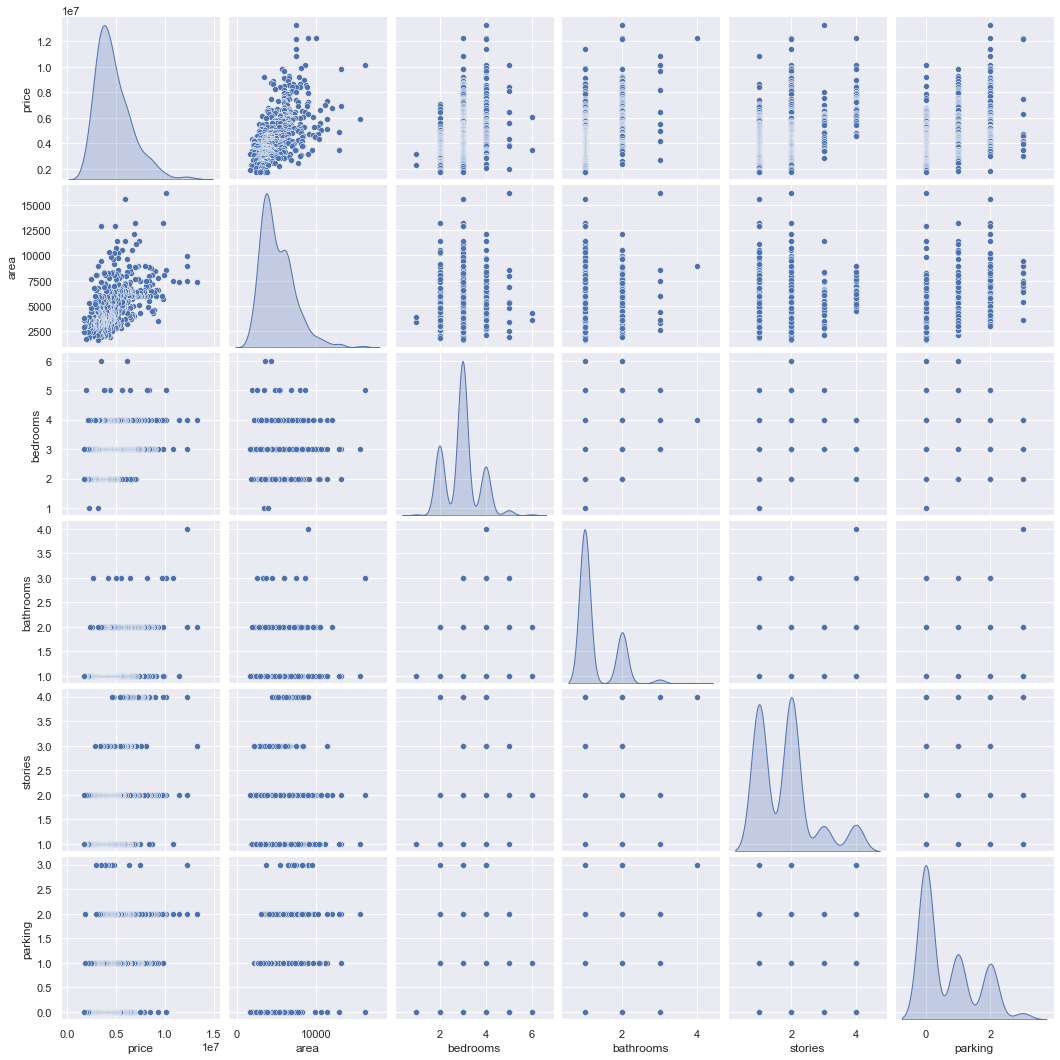

In [35]:
columns_ = ["price","area","bedrooms","bathrooms","stories","parking"]
sns.pairplot(df[columns_], diag_kind = 'kde')
plt.show()

## Visualisasi Korelasi Variable Numerik

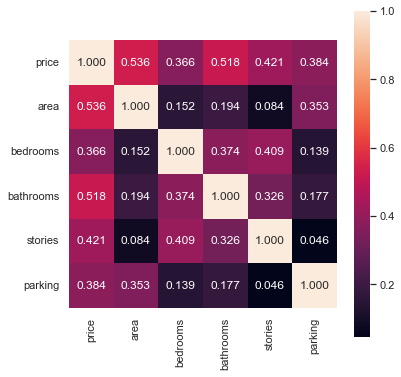

In [36]:
corr_ = df[columns_].corr()
plt.figure(figsize = (6,6))
sns.heatmap(corr_, fmt= ".3f", annot= True,square= True)
plt.show()

Pada tabel korelasi di atas, didapatkan informasi bahwa setiap variable memiliki korelasi dengan variable outcome (price). Dari setiap variablenya tidak ada korelasi yang cukup tinggi yang menyebabkan multikolinearitas.

Pada seluruh uji statistik dan korelasi di atas, dapat diambil kesimpulan bahwa seluruh variable memiliki kontribusi terhadap variable outcome. Selanjutnya, kita akan memasukkannya ke regression model. 

# Building Regression Model

In [38]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('price ~ area + bedrooms + bathrooms + stories + mainroad + guestroom + basement + hotwaterheating + airconditioning +  parking + prefarea + furnishingstatus', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          9.07e-123
Time:                        16:48:37   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Dari hasil di atas, pada uji F-test, nilai F-Statistics kurang dari 0.05, sehingga dapat disimpulkan bahwa model kita sudah cukup bagus/layak pakai.
Pada nilai uji T, variable bedrooms memiliki nilai lebih dari 0.05, sehingga variable bedrooms kurang signifikan terhadap model.

Untuk memudahkan interpretasi, kita transformasikan variable price dengan 1000000. Selanjutnya, kita kita coba membuat model lagi dengan tanpa menggunakan variable **bedrooms**

In [39]:
df['price_m'] = df['price']/1000000

In [40]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('price_m ~ area + bathrooms + stories + mainroad + guestroom + basement + airconditioning + parking + hotwaterheating + prefarea + furnishingstatus', data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                price_m   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.34
Date:                Thu, 06 Jul 2023   Prob (F-statistic):          3.14e-123
Time:                        16:51:02   Log-Likelihood:                -803.33
No. Observations:                 545   AIC:                             1633.
Df Residuals:                     532   BIC:                             1689.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Pada model tersebut, didapatkan nilai R-squared 0.680 yang artinya variable bebas yang digunakan cukup dapat digunakan untuk menjelaskan model kita

## Interpretasi Model

Dari model yang sudah kita bagun, dapat diinterpretasikan sebagai berikut:

- Pada variable mainroads, jika variable lain berada pada level yang sama, maka harga rumah yang berada pada jalan utama akan lebih tinggi 0.3937 juta USD dari pada yang tidak berada pada jalan utama
- Pada variable guestroom, jika variable lain berada pada level yang sama, maka harga rumah yang memiliki ruang tamu akan lebih tinggi 0.2958 juta USD dari pada yang tidak memiliki ruang tamu
- Pada variable airconditioning, jika variable lain berada pada level yang sama, maka harga rumah yang memiliki AC akan lebih tinggi 0.8633 juta USD dari pada yang tidak memiliki AC
- Pada variable hotwaterheating, jika variable lain berada pada level yang sama, maka harga rumah yang memiliki pemanas air akan lebih tinggi 0.8633 juta USD dari pada yang tidak memiliki pemanas air
- Pada variable prefarea, jika jika variable lain berada pada level yang sama, maka harga rumah yang berada di lokasi prefarea akan lebih tinggi 0.6554 juta USD dari pada yang tidak memiliki pemanas air
- Jika variable lain berada pada level yang sama, maka harga rumah yang semi furnished akan lebih rendah 0.041 juta USD dari pada yang furnished.
- Jika variable lain berada pada level yang sama, maka harga rumah yang unfurnished akan lebih rendah 0.418 juta USD dari pada yang furnished
- Jika variable lain berada pada level yang sama, kenaikan luas sebesar 1 m2 juga akan menaikkan rata-rata harga rumah sebesar 0.002 juta USD
- Jika variable lain berada pada level yang sama, jika jumlah 1 kamar mandi lebih banyak, akan menaikkan rata-rata harga rumah sebesar 1.02 juta USD
- Jika variable lain berada pada level yang sama, jika jumlah jumlah 1 lantai lebih banyak, akan menaikkan rata-rata harga rumah sebesar 0.4865 juta USD
- Jika variable lain berada pada level yang sama, jika jumlah terdapat 1 tempat parkir lebih banyak, akan menaikkan rata-rata harga rumah sebesar 0.2836 juta USD

## Kesimpulan

- Berdasarkan uji-F dan uji-T pada model, model linear regression dapat memprediksi dengan cukup baik dengan nilai R-square 0.68 artinya variasi variable bebas yang digunakan cukup dapat digunakan untuk menjelaskan model kita. Adapun variable yang menentukan harga rumah antara lain : mainroad, guestroom, airconditioning, hotwaterheating, prefarea, furnishedstatus, luas tanah, jumlah kamar mandi, jumlah lantai, dan jumlah tempat parkir
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang berada pada jalan utama lebih tinggi daripada yang tidak terhubung dengan jalan utama
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang memiliki ruang tamu lebih tinggi daripada yang tidak memiliki ruang tamu
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang memiliki basement lebih tinggi daripada yang tidak memiliki basement
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang memiliki pemanas air lebih tinggi daripada yang tidak memiliki pemanas air
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang memiliki AC lebih tinggi daripada yang tidak memiliki AC
- Berdasarkan uji statistik dan model, rata-rata harga rumah yang berlokasi di prefarea lebih tinggi daripada yang tidak berada pada prefarea

## Rekomendasi

- Untuk mendapatkan harga rumah, pembeli atau penjual dapat melakukan prediksi dengan memasukkan nilai ke dalam model regresi yang telah dibuat sehingga tidak terjebak pada overprice atau underprice
- Untuk jangka pendek, bagi penjual yang ingin menaikkan harga rumah, penjual dapat menambahkan AC, waterheater atau perabotan lainnya agar menjadi rumah dengan kategori furnished
- Untuk jangka panjang, bagi penjual yang ingin menaikkan harga rumah dapat dengan cara melakukan renovasi dengan menambahkan ruang tamu, kamar tidur, dan lantai
- Bagi pembeli yang ingin membeli dengan harga lebih murah, pembeli dapat mempertimbangkan untuk mencari rumah yang tidak memiliki AC, tidak memiliki pemanas air, dengan luas tanah yang lebih kecil, tidak berada pada jalan utama, tidak memiliki basement, tidak memiliki ruang tamu, jumlah lantai yang lebih sedikit, atau rumah dalam keadaan yang semi-furnished atau unfurnished.

## Rekomendasi untuk Penelitian Selanjutnya

- Untuk menaikkan performa model, dapat dicoba untuk menggunakan transformasi tambahan (log/resiprokal)
- Untuk dapat memberikan prediksi yang lebih baik dan mengurangi overfitting, dapat dicoba untuk menggunakan K-fold cross validation